# Marketing Data Analysis (Banking)

# **1. Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import seaborn as sns
import statsmodels.api as sm
import os
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
sns.set()
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import warnings
warnings.filterwarnings('ignore')

# **2. Read data**

In [2]:
## This will show current working diractory
os.getcwd()

'C:\\Users\\Dell'

In [3]:
# Read the data from cvs into a Pandas DataFrame
data= pd.read_csv(r'C:\Users\Dell\Downloads\Data Sets\Banking_marketing_data.csv')
data.head()


,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


### Fixing the rows and columns


In [4]:
# Read the file in data without first two rows as it is of no use.
data0 = pd.read_csv(r'C:\Users\Dell\Downloads\Data Sets\Banking_marketing_data.csv',skiprows = 2)
# This give top 5 rows of datset
data0.head()


,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [5]:
#Extract job  & Education in newly from "jobedu" column.

data0['job']= data0['jobedu'].apply(lambda x: x.split(",")[0])
data0['education']= data0['jobedu'].apply(lambda x: x.split(",")[1])

# Drop the "jobedu" column from the dataframe.
data0.drop('jobedu', axis = 1, inplace = True)

# Printing the Dataset
data0.head()

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,1,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,2,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,3,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,4,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,5,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


### **About this data** 

This is the classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository. The dataset gives you information about a marketing campaign of a financial institution. 

Input variables:
- Age (Age of customer)
- Job (Job of customer)
- Martial (Martial status of customer)
- Education (Customer education level)
- Defaul (Has credit in default?)
- Housing (If costumer has housing loan)
- Loan	  (Has Personal Loan)
- Balance (Customer's individual balance)
- Contact (Communication type)
- Month	   (Last contact month of year)
- Day	   (Last contact day of the week)
- Duration	(Last contact duration, in seconds,this attribute highly affects the output target (e.g., if duration=0 theny='no')
- Campaign	(Number of contacts performed during this campaign and for this client)
- Pdays	    (Number of days that passed by after the client was last contacted from a previous campaign)
- Previous	(Number of contacts performed before this campaign and for this client)
- Poutcome	(outcome of the previous marketing campaign)
- Response	(has the client subscribed a term deposit (binary: 'yes','no')
- Salary     ( Salary of client)
- Targeted    (particular customer before targeted or not)
- customerid  (customerid for perticular customer)


### Objective: 
Analyze data in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

# **3. Data review and checks**

In [6]:
print(data0.shape)

(45211, 20)


- This dataset has rows=45211 and columns=19

In [7]:
# Check data types in this dateset
numeric_col= list(data0.select_dtypes(np.number))
print(numeric_col)
print(len(numeric_col))
categorical_col= list(data0.select_dtypes(include= 'object'))
print((categorical_col))
print(len(categorical_col))

['customerid', 'age', 'salary', 'balance', 'day', 'campaign', 'pdays', 'previous']
8
['marital', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'duration', 'poutcome', 'response', 'job', 'education']
12


In [8]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   targeted    45211 non-null  object 
 6   default     45211 non-null  object 
 7   housing     45211 non-null  object 
 8   loan        45211 non-null  object 
 9   contact     45211 non-null  object 
 10  day         45211 non-null  int64  
 11  month       45161 non-null  object 
 12  duration    45211 non-null  object 
 13  campaign    45211 non-null  int64  
 14  pdays       45211 non-null  int64  
 15  previous    45211 non-null  int64  
 16  poutcome    45211 non-null  object 
 17  response    45181 non-null  object 
 18  job         45211 non-null  object 
 19  education   45211 non-nul

In [9]:
# Handling duplicate values
data0.duplicated().sum()

0

- Thare is no duplicate values in this dataset

In [10]:
# drop customerid column as it is not useful

data1= data0.drop(['customerid'], axis=1)
data1.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


## **3.1 Descriptive Statistics**

Descriptive statistics are used to describe or summarize the characteristics of a sample or data set, such as a variable's mean, standard deviation, or median. 

In [11]:
data1.describe()

,age,salary,balance,day,campaign,pdays,previous
count,45191.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.935651,57006.171065,1362.272058,15.806419,2.763841,40.197828,0.580323
std,10.619198,32085.718415,3044.765829,8.322476,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


#### Below conclusion can be done based on data summary:

- Maximum age is 95 and minimum age is 18. 


- Maximum salary of customer is 120000 and minimum salary is 0.


- Minimum account balance of customer is in negative and maximum balance is 102127.


- Maximum number of contacts performed during this campaign for perticular customer is 63 and minimum contact is 1.


- Maximum number of days that passed by after the client was last contacted from a previous campaign is 871.


- Number of contacts performed before this campaign for customer maximum is 275 and minimum is 0.


## 3.2 Null Check

In [12]:
data1.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

- As we can see three columns (age, month, response) contain missing values.

- We can handle missing values by dropping the missing records or by imputing the values.

#### If missing values present in the data
- First Outlier Treatment and then Missing Data Imputation because the outliers will also influence the missing data algorithms in a negative manner.

## 3.3 Handling Outliers

There are two type of outliers

Univariate Outliers: Univariate outliers are the data points whose values lie beyond the range of expected values based on one variable.

Multivariate Outliers: While ploting data, some values of one variable may not the beyond the expected range, but when you plot the datawith some other variable, these values may be lie far from the expected value.

### Outliers for age

In [13]:
## check the skewness of the data
data1.skew().sort_values()

day          0.093079
salary       0.137829
age          0.685001
pdays        2.615715
campaign     4.898650
balance      8.360308
previous    41.846454
dtype: float64

<AxesSubplot:xlabel='age', ylabel='Density'>

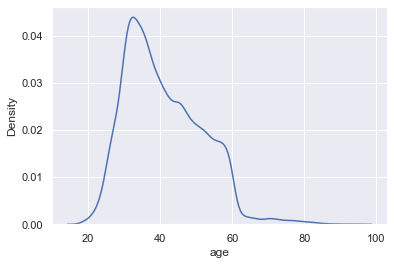

In [14]:
sns.kdeplot(data1['age'])

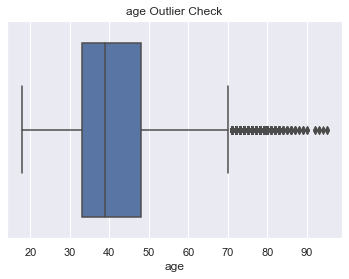

In [15]:
sns.boxplot(x=data1['age'])
plt.title('age Outlier Check')
plt.show()

In [16]:
Qntl1 = data1['age'].quantile(0.25)  ## 25% of the customers have age less than Qntl1
Qntl3 = data1['age'].quantile(0.75)  ## 75% of the customers have age less than Qntl3
IQR = Qntl3 - Qntl1
lw= Qntl1 - 1.5* IQR
up = Qntl3 + 1.5* IQR

In [17]:
print("Outlier percentage in Age:",((data1[data1['age']>up].shape[0]+ data1[data1['age']<lw].shape[0])/data1.shape[0])*100)

Outlier percentage in Age: 1.0771714848156422


- In this dataset age outliers percentage is almost 1%. So we can replace this data by upper bound limit.

In [18]:
## customers age more than upper bound are replaced with upper bound age
data1['age'] = np.where(data1['age']> up, up, data1['age'])
## customers age less than lower bound are replaced with lower bound age
data1['age'] = np.where(data1['age']< lw, lw, data1['age'])

10.5 70.5


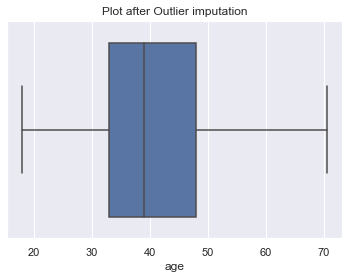

In [19]:
# After outliers imputation 
print(lw, up)
sns.boxplot(x=data1['age'])
plt.title('Plot after Outlier imputation')
plt.show()

- By the analyzing of age column, we found that minimum age of customers is 18 and maximum age is 95.


- We replace maximum  age by upper bound of age (70.5), age between 18 to 70.5 is valid range to target customer for loan.

### Outliers for salary

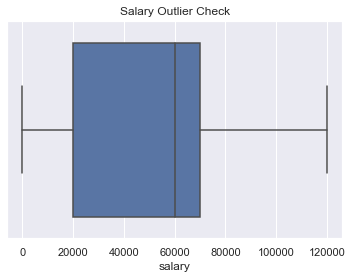

In [20]:
sns.boxplot(x=data1['salary'])
plt.title('Salary Outlier Check')
plt.show()

- By the analyzing above graph, we can find that salary column does not have any outliers.


- Maximum salary of customer is 120000 and minimum salary is 0.

### Outliers for balance¶

<AxesSubplot:xlabel='balance', ylabel='Density'>

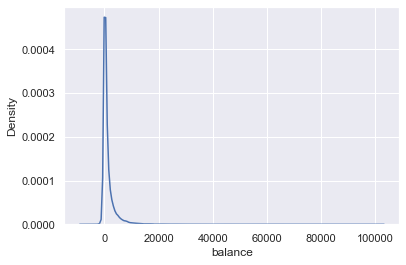

In [21]:
sns.kdeplot(data1['balance'])

In [22]:
print("Maximum balance:" ,data1['balance'].max())
print("Minimum balance:d" ,data1['balance'].min())
print("Negative balance: ", len(data1[data1['balance']<0])/len(data1))

Maximum balance: 102127
Minimum balance:d -8019
Negative balance:  0.08329831235761209


- By the analyzing of balance column, we find that minimum account balance of customers is -8019 and maximum balance is 102127. And this is valid range so, balance column does not have outliers.


- Almost 8% customers have negative balance is an indicator that some customers have a loan account.

### Outliers for campaign

<AxesSubplot:xlabel='campaign', ylabel='Density'>

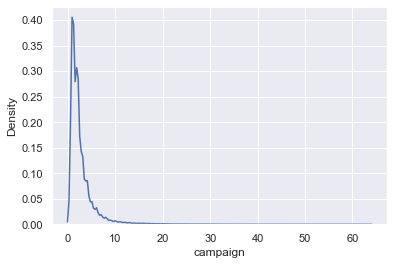

In [23]:
sns.kdeplot(data1['campaign'])

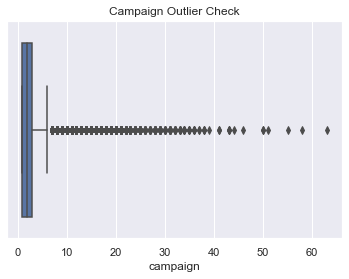

In [24]:
sns.boxplot(x=data1['campaign'])
plt.title('Campaign Outlier Check')
plt.show()

In [25]:
Qntl1 = data1['campaign'].quantile(0.25)  
Qntl3 = data1['campaign'].quantile(0.75)  
IQR = Qntl3 - Qntl1
lw = Qntl3 - 1.5* IQR
up = Qntl3 + 1.5* IQR
## customers campaign more than upper bound are replaced with upper bound campaign
data1['campaign'] = np.where(data1['campaign']> up, up, data1['campaign'])


0.0 6.0


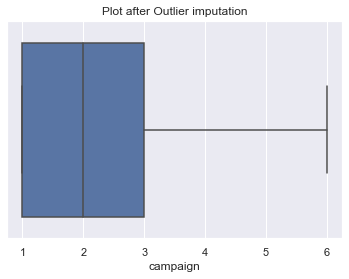

In [26]:
# After outliers imputation 
print(lw, up)
sns.boxplot(x=data1['campaign'])
plt.title('Plot after Outlier imputation')
plt.show()

- By the analyzing box plot, we can find that in this campaign contact a particular customer for maximum 6 time and minimum 0 time.


### Outlier for pdays

<AxesSubplot:xlabel='pdays', ylabel='Density'>

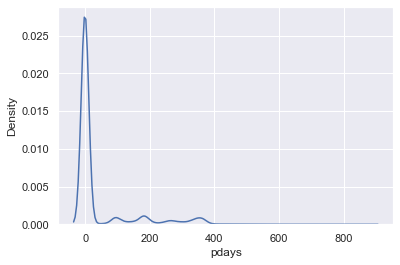

In [27]:
sns.kdeplot(data1['pdays'])

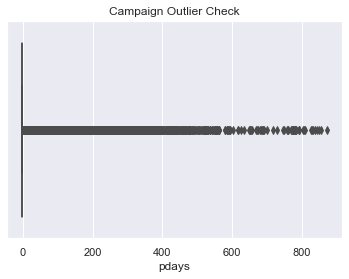

In [28]:
sns.boxplot(x=data1['pdays'])
plt.title('Campaign Outlier Check')
plt.show()

In [29]:
print("Maximum pdays:" ,data1['pdays'].max())
print("Minimum pdays:" ,data1['pdays'].min())
print("customer not contacted in perivious campaign:", len(data1[data1['pdays']== -1])/ len(data1))

Maximum pdays: 871
Minimum pdays: -1
customer not contacted in perivious campaign: 0.8173674548229414


- By analyzing the pdays data, we find that a large number of customers 81% not contacted previously by bank.


- We consider, number of days that passed by after the client was last contacted from a previous campaign has no outliers because pdays range does not affect our current campaign.



### Outlier for Previous

<AxesSubplot:xlabel='previous', ylabel='Density'>

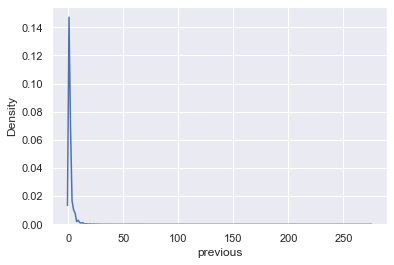

In [30]:
sns.kdeplot(data1['previous'])

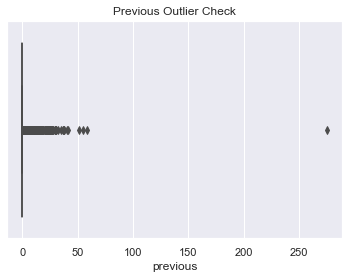

In [31]:
sns.boxplot(x=data1['previous'])
plt.title('Previous Outlier Check')
plt.show()

In [32]:
print("max:" ,data1['previous'].max())
print("previously not contected customer:", len(data1[data1['previous']==0])/len(data1))

max: 275
previously not contected customer: 0.8173674548229414


In [33]:
## customers previous contact more than upper bound are replaced with upper bound balance
data1['previous'] = np.where(data1['previous']>30, 30, data1['previous'])

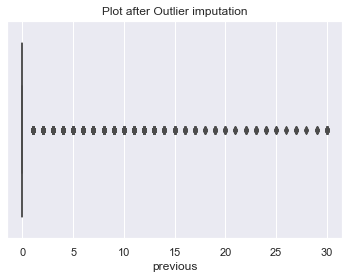

In [34]:
# After outliers imputation 
sns.boxplot(x=data1['previous'])
plt.title('Plot after Outlier imputation')
plt.show()

- By analyzing the previous data, we find that number of contacts performed before this campaign for particular customer was very low. 


- Almost 81% customers were not previously contacted for loan.


## 3.4 Missing value imputation

In [35]:
# Check null values in the data 
data1.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [36]:
# Drop response missing values 
data2= data1[~data1['response'].isnull()]

Here we deleting the missing values from response column because response column is our targeted variable and if we impute the values in target column it’ll affect our analysis. So, it is better to drop the missing values from Response Column.


In [37]:
# Find the mode of month in data
month_mode = data2.month.mode()[0]
print(month_mode)

# Replacing missing values in month column by Mode
data2.month.fillna(month_mode, inplace = True)

may, 2017


In [38]:
# Find the median of age in data
age_median= data2.age.median()
print(age_median)

# Replacing missing values in age by Median
data2.age.fillna(age_median, inplace= True)

39.0


In [39]:
# After imputation of missing values
data2.isnull().sum().sum()

0

### Descriptive Statistics (after missing values imputation)

In [40]:
data2.describe()

,age,salary,balance,day,campaign,pdays,previous
count,45181.000000,45181.000000,45181.000000,45181.000000,45181.000000,45181.000000,45181.000000
mean,40.866836,57005.046369,1362.689936,15.807153,2.392067,40.198601,0.572010
std,10.392443,32089.163369,3045.584521,8.322919,1.600028,100.134050,1.853982
min,18.000000,0.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,70.500000,120000.000000,102127.000000,31.000000,6.000000,871.000000,30.000000


### Below conclusion can be done based on data summary:
- Maximum age is 70.5 and minimum age is 18.
 
- Maximum salary of customer is 120000 and minimum salary is 0.

- Minimum account balance of customer is in negative; it means some accounts are loan account and maximum balance is 102127.

- Maximum number of contacts performed during this campaign for particular customer is 6 and minimum contact is 1.

- Maximum number of days that passed by after the client was last contacted from a previous campaign is 871 and minimum days is -1, it means some customers are not contacted previously.

- A large number of customers were not contacted in previous campaign and maximum time contact a customer is 275.


## 3.5 Univariate Analysis 

Univariate, in which we analyze date of just one variable. A variable in our dataset refers to a single feature/column.

### Analysis of response record of customers

no     39894
yes     5287
Name: response, dtype: int64
Yes Response percentage: 0.117


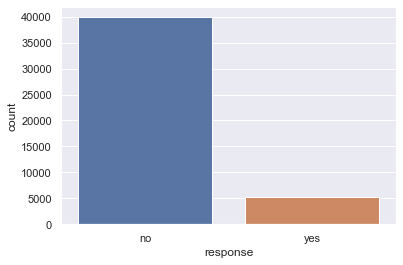

In [41]:
# count of response of customer
response_counts = data2['response'].value_counts()
print(response_counts)
print("Yes Response percentage:", np.round(data2[data2['response']=='yes'].shape[0]/data2.shape[0],3))

# plot of customer response 
sns.countplot(data2.response)
plt.show()

- By analyzing the figure above, we can see that maximum response of customers is negative. It means our previous campaign was not that much effective. 


- Customers response for "yes" is around 11.7%.



### Analysis last contact month of year

may, 2017    13788
jul, 2017     6886
aug, 2017     6235
jun, 2017     5329
nov, 2017     3963
apr, 2017     2929
feb, 2017     2645
jan, 2017     1402
oct, 2017      738
sep, 2017      576
mar, 2017      476
dec, 2017      214
Name: month, dtype: int64


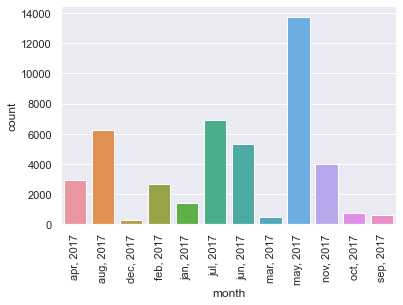

In [42]:
data3= data2.sort_values(['month'])
month_counts = data3['month'].value_counts()
print(month_counts)

# plot
sns.countplot(x='month', data= data3)
plt.xticks(rotation=90)
plt.show()

- By analyzing above figure, we can see that maximum customers were contacted (13788) in month of "may" and minimum contacted (214) in month of "dec". It means our previous campaign was most active during summer time.

### Communication Types

cellular     29267
unknown      13010
telephone     2904
Name: contact, dtype: int64


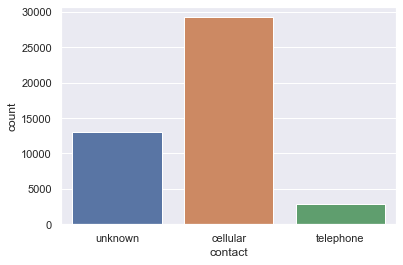

In [43]:
contact_counts = data2['contact'].value_counts()
print(contact_counts)

# plot
sns.countplot(x='contact', data= data2)
plt.show()

- 	Maximum customer prefers communication via cellular (29267) and minimum communication via telephone (2904).

### Analysis of marital status of customers

married     27195
single      12782
divorced     5204
Name: marital, dtype: int64


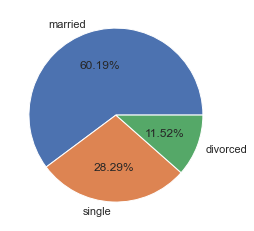

In [44]:
# count of marital status of customer
marital_counts = data2['marital'].value_counts()
print(marital_counts) 

plt.pie(data2['marital'].value_counts(), labels=data2['marital'].unique(), autopct='%1.2f%%')
plt.show()

- By analyzing the figure above, we can see that customer marital status has three categories (Single, Divorced, Married).


- Married customers are maximum (60.19%) and minimum customers are divorced (11.25%).

### Housing loan

yes    25112
no     20069
Name: housing, dtype: int64
yes precentage for house loan: 0.556


<AxesSubplot:xlabel='housing', ylabel='count'>

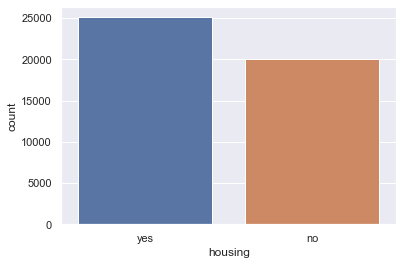

In [45]:
housing_loan_counts = data2['housing'].value_counts()
print(housing_loan_counts )
print("yes precentage for house loan:", np.round(data2[data2['housing']=='yes'].shape[0]/data2.shape[0],3))
sns.countplot(x='housing',data=data2)

- The positive response of customers for housing loan around 55%.

### Loan

no     37943
yes     7238
Name: loan, dtype: int64
yes precentage for loan: 0.16


<AxesSubplot:xlabel='loan', ylabel='count'>

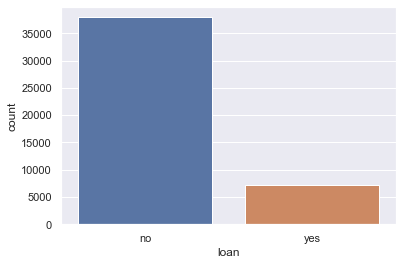

In [46]:
loan_counts = data2['loan'].value_counts()
print(loan_counts )
print("yes precentage for loan:", np.round(data2[data2['loan']=='yes'].shape[0]/data2.shape[0],3))
sns.countplot(x='loan',data=data2)

- Most of customers response "no" for personal loan and "yes" response percentage is 16%.

### Analysis of type of jobs of customers

blue-collar      9727
management       9454
technician       7592
admin.           5166
services         4150
retired          2263
self-employed    1575
entrepreneur     1486
unemployed       1303
housemaid        1239
student           938
unknown           288
Name: job, dtype: int64


<AxesSubplot:title={'center':'Job types of customers'}>

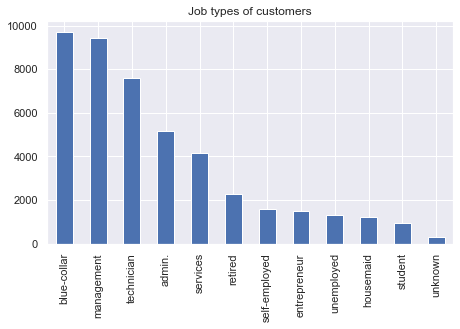

In [47]:
# count of job types of customer
job_counts = data2['job'].value_counts()
print(job_counts)
# Bar plot
plt.subplot(221)
data2['job'].value_counts().plot(kind='bar', title='Job types of customers',figsize=(16,9))

- Maximum customers have blue-coller jobs (9727) and some part of jobs types is unknown(288).


### Analysis of Poutcome

unknown    36935
failure     4897
other       1839
success     1510
Name: poutcome, dtype: int64


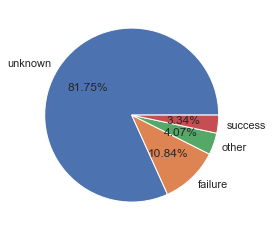

In [48]:
# count of previously targeted customer
poutcome_counts = data2['poutcome'].value_counts()
print(poutcome_counts) 

plt.pie(data2['poutcome'].value_counts(), labels=data2['poutcome'].unique(), autopct='%1.2f%%')
plt.show()

- By analyzing above graph, we find that outcome of the previous marketing campaign was not pretty good. As we can see that success rate is 3.34% which is very low.


- Almost 81.75% outcome is unknown and 10.84% campaign outcome is failure and 4.07% outcome goes for another category.

### Analysis of Default credit

no     44366
yes      815
Name: default, dtype: int64


<AxesSubplot:xlabel='default', ylabel='count'>

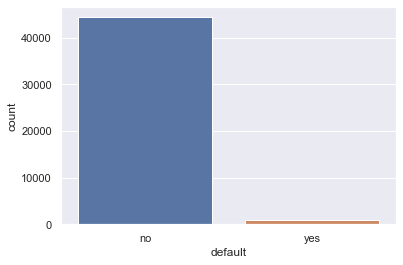

In [49]:
# count of job types of customer
job_counts = data2['default'].value_counts()
print(job_counts)
sns.countplot(x='default',data=data2)

- The count for default loan is less.


###  Analysis of customers education

secondary    23189
tertiary     13292
primary       6844
unknown       1856
Name: education, dtype: int64


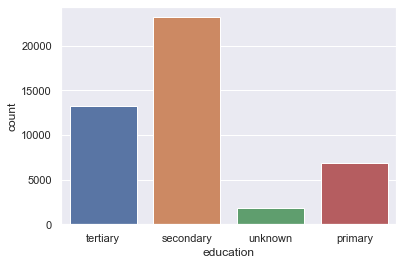

In [50]:
# count of education type of customers
education_counts = data2['education'].value_counts()
print(education_counts)
# plot of customer eduaction type
sns.countplot(data2.education)
plt.show()

- Maximum customers (23189) belong to secondary education category and some count of education type is unknown (1856).


- Education type count decrease from secondary to primary.


### Distribution plots of numeric columns¶

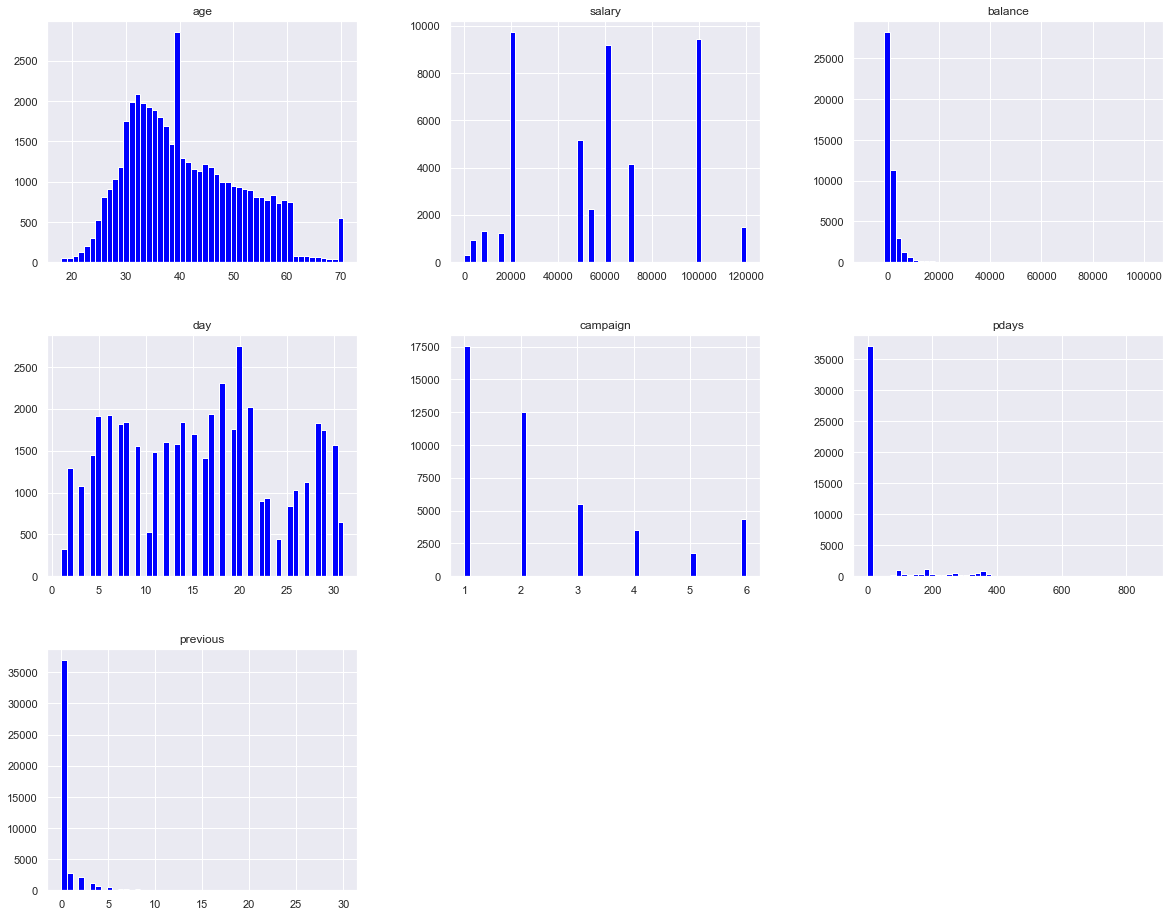

In [51]:
%matplotlib inline
data2.hist(bins = 50, figsize=(20,16), color = 'blue') 
plt.show()

## 3.6 Bivariate Analysis

### Comparision of job, education, marital and contact data with target variable "response"

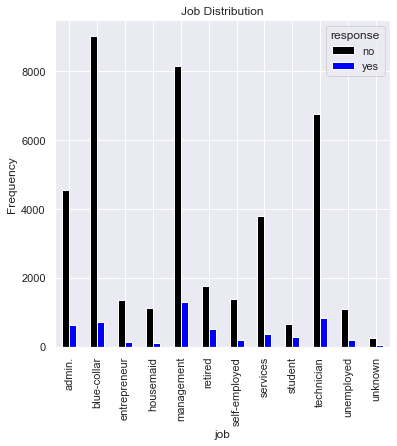

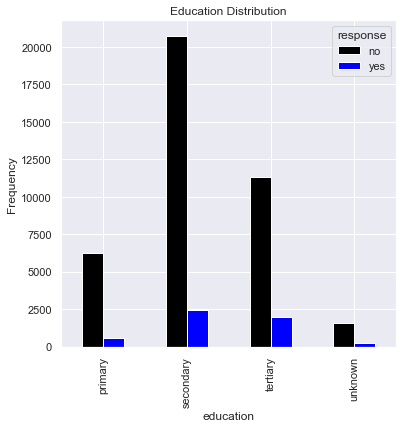

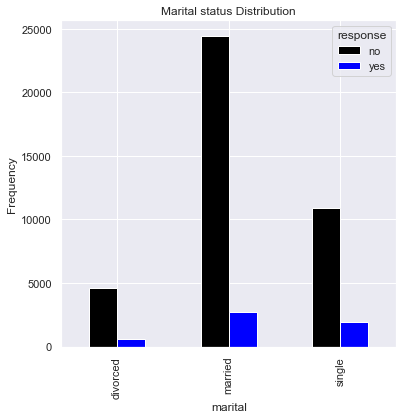

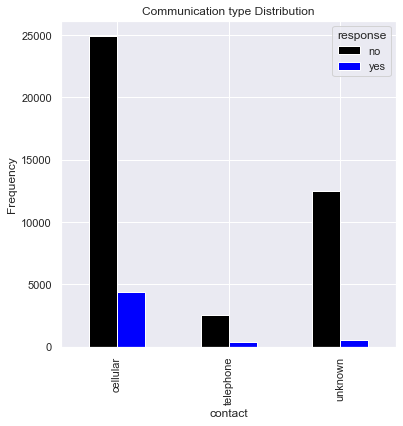

In [52]:
# job vs response 
pd.crosstab(data2.job,data2.response).plot(kind="bar",figsize=(6,6),color=['black','blue'])
plt.title('Job Distribution')
plt.ylabel('Frequency')
# education vs response
pd.crosstab(data2.education,data2.response).plot(kind="bar",figsize=(6,6),color=['black','blue'])
plt.title('Education Distribution')
plt.ylabel('Frequency')
# marital vs response
pd.crosstab(data2.marital,data2.response).plot(kind="bar",figsize=(6,6),color=['black','blue'])
plt.title('Marital status Distribution')
plt.ylabel('Frequency')
# contact vs response
pd.crosstab(data2.contact,data2.response).plot(kind="bar",figsize=(6,6),color=['black','blue'])
plt.title('Communication type Distribution')
plt.ylabel('Frequency')

plt.show()

### Comparision of housing loan, loan and default data with target variable "response"

Text(0, 0.5, 'Frequency')

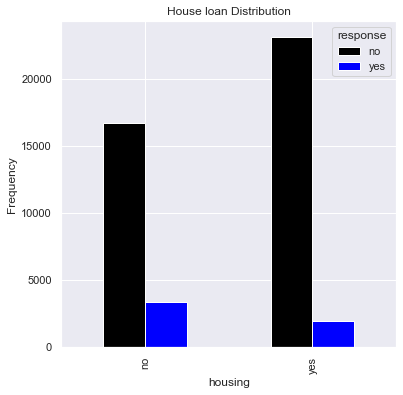

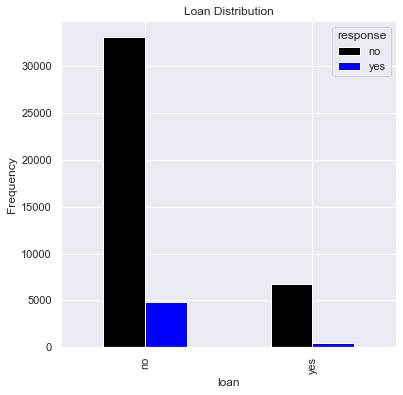

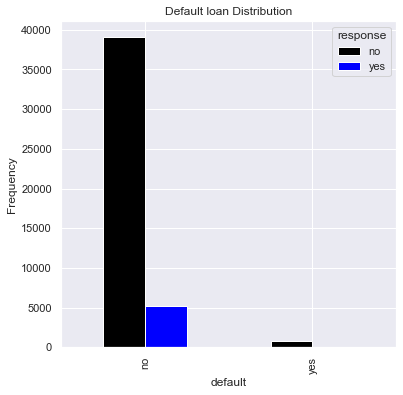

In [53]:
# housing vs response
pd.crosstab(data2.housing,data2.response).plot(kind="bar",figsize=(6,6),color=['black','blue'])
plt.title('House loan Distribution')
plt.ylabel('Frequency')
# loan vs response
pd.crosstab(data2.loan,data2.response).plot(kind="bar",figsize=(6,6),color=['black','blue'])
plt.title('Loan Distribution')
plt.ylabel('Frequency')
# default vs response
pd.crosstab(data2.default,data2.response).plot(kind="bar",figsize=(6,6),color=['black','blue'])
plt.title('Default loan Distribution')
plt.ylabel('Frequency')

- Default customers not targeted for further loan. 

Text(0, 0.5, 'Frequency')

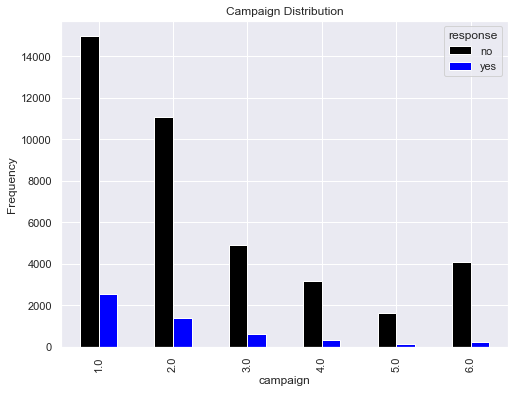

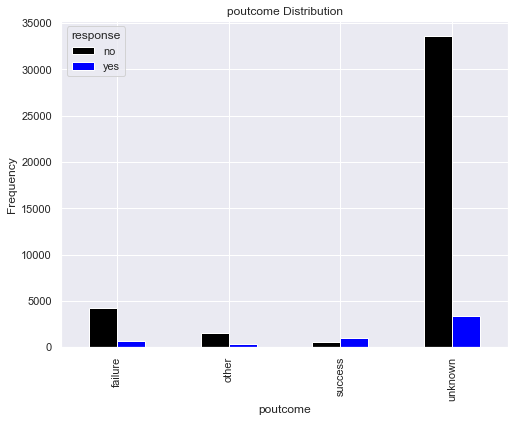

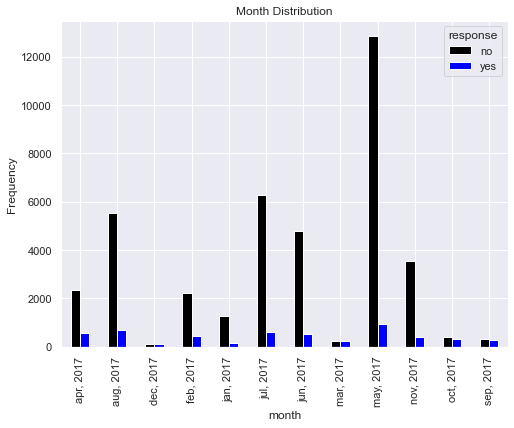

In [54]:
# campaign vs response
pd.crosstab(data2.campaign,data2.response).plot(kind="bar",figsize=(8,6),color=['black','blue'])
plt.title('Campaign Distribution')
plt.ylabel('Frequency')
# poutcome vs response
pd.crosstab(data2.poutcome,data2.response).plot(kind="bar",figsize=(8,6),color=['black','blue'])
plt.title('poutcome Distribution')
plt.ylabel('Frequency')
# month vs response
pd.crosstab(data2.month,data2.response).plot(kind="bar",figsize=(8,6),color=['black','blue'])
plt.title('Month Distribution')
plt.ylabel('Frequency')

In [55]:
a1 = data2[(data2['month']=='may, 2017')]['response'].value_counts()
print("Yes response percentage for may month: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))

a1 = data2[(data2['month']=='mar, 2017')]['response'].value_counts()
print("Yes response percentage for march month: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))

a1 = data2[(data2['month']=='oct, 2017')]['response'].value_counts()
print("Yes response percentage for october month: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))

a1 = data2[(data2['month']=='sep, 2017')]['response'].value_counts()
print("Yes response percentage for september month: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))

a1 = data2[(data2['month']=='aug, 2017')]['response'].value_counts()
print("Yes response percentage for august month: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))



Yes response percentage for may month:  6.745
Yes response percentage for march month:  51.8908
Yes response percentage for october month:  43.7669
Yes response percentage for september month:  46.5278
Yes response percentage for august month:  11.0345


### Comparision of call duration with target variable "response"

In [56]:
data4 = data2.sort_values('duration', ascending=False)
data4.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
4647,39.0,100000,351,married,yes,no,yes,no,unknown,20,"may, 2017",999 sec,3.0,-1,0,unknown,no,management,tertiary
13731,26.0,20000,-29,single,yes,no,yes,no,cellular,10,"jul, 2017",998 sec,4.0,-1,0,unknown,yes,blue-collar,secondary
3484,48.0,120000,981,married,yes,no,yes,no,unknown,15,"may, 2017",995 sec,2.0,-1,0,unknown,no,entrepreneur,tertiary
10380,47.0,16000,3727,single,no,no,no,no,unknown,12,"jun, 2017",993 sec,6.0,-1,0,unknown,yes,housemaid,tertiary
13467,58.0,120000,776,married,yes,no,yes,no,telephone,9,"jul, 2017",990 sec,1.0,-1,0,unknown,yes,entrepreneur,tertiary


In [57]:
temp1 = data4[data4['duration'].str.contains('min')]
temp1['duration'] = temp1['duration'].replace(' min','', regex=True)
temp1['duration'] = temp1['duration'].astype(float)
temp1['duration'] = temp1['duration']*60
temp1.head(5)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
39137,26.0,20000,-93,single,yes,no,yes,no,cellular,18,"may, 2017",599.0,2.0,-1,0,unknown,no,blue-collar,secondary
15997,48.0,50000,-379,married,yes,no,yes,no,cellular,22,"jul, 2017",599.0,2.0,-1,0,unknown,no,admin.,secondary
32930,34.0,20000,170,married,yes,no,yes,yes,telephone,17,"apr, 2017",599.0,4.0,275,7,other,no,blue-collar,primary
26132,37.0,60000,5287,married,yes,no,yes,yes,cellular,19,"nov, 2017",599.0,4.0,100,2,failure,no,technician,secondary
32541,50.0,20000,181,married,yes,no,yes,no,cellular,17,"apr, 2017",599.0,2.0,-1,0,unknown,no,blue-collar,secondary


In [58]:
temp2 = data4[data4['duration'].str.contains('sec')]
temp2['duration'] = temp2['duration'].replace(' sec','', regex=True)
temp2['duration'] = temp2['duration'].astype(float)
temp2.head(5)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
4647,39.0,100000,351,married,yes,no,yes,no,unknown,20,"may, 2017",999.0,3.0,-1,0,unknown,no,management,tertiary
13731,26.0,20000,-29,single,yes,no,yes,no,cellular,10,"jul, 2017",998.0,4.0,-1,0,unknown,yes,blue-collar,secondary
3484,48.0,120000,981,married,yes,no,yes,no,unknown,15,"may, 2017",995.0,2.0,-1,0,unknown,no,entrepreneur,tertiary
10380,47.0,16000,3727,single,no,no,no,no,unknown,12,"jun, 2017",993.0,6.0,-1,0,unknown,yes,housemaid,tertiary
13467,58.0,120000,776,married,yes,no,yes,no,telephone,9,"jul, 2017",990.0,1.0,-1,0,unknown,yes,entrepreneur,tertiary


In [59]:
# concatination of duration column
data2 = pd.concat([temp1, temp2])
data2.reset_index(drop=True, inplace=True)
data2.shape

(45181, 19)

In [60]:
# Create bins for duration
data2['duration_bins_sec'] = pd.cut(x=data2['duration'], bins=[0,60,180,300,600,1200,4918])
data2.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education,duration_bins_sec
0,26.0,20000,-93,single,yes,no,yes,no,cellular,18,"may, 2017",599.0,2.0,-1,0,unknown,no,blue-collar,secondary,"(300, 600]"
1,48.0,50000,-379,married,yes,no,yes,no,cellular,22,"jul, 2017",599.0,2.0,-1,0,unknown,no,admin.,secondary,"(300, 600]"
2,34.0,20000,170,married,yes,no,yes,yes,telephone,17,"apr, 2017",599.0,4.0,275,7,other,no,blue-collar,primary,"(300, 600]"
3,37.0,60000,5287,married,yes,no,yes,yes,cellular,19,"nov, 2017",599.0,4.0,100,2,failure,no,technician,secondary,"(300, 600]"
4,50.0,20000,181,married,yes,no,yes,no,cellular,17,"apr, 2017",599.0,2.0,-1,0,unknown,no,blue-collar,secondary,"(300, 600]"


In [61]:
a1 = data2[(data2['duration']>0)&(data2['duration']<60)]['response'].value_counts()
print("Yes response percentage for 0-60 sec duration: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))
a1 = data2[(data2['duration']>60)&(data2['duration']<180)]['response'].value_counts()
print("Yes response percentage for 60-180 sec duration: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))
a1 = data2[(data2['duration']>180)&(data2['duration']<300)]['response'].value_counts()
print("Yes response percentage for 180-300 sec duration: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))
a1 = data2[(data2['duration']>300)&(data2['duration']<600)]['response'].value_counts()
print("Yes response percentage for 300-600 sec duration: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))
a1 = data2[(data2['duration']>600)&(data2['duration']<1200)]['response'].value_counts()
print("Yes response percentage for 600-1200 sec duration: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))
a1 = data2[(data2['duration']>1200)]['response'].value_counts()
print("Yes response percentage for 1200 sec duration: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))

Yes response percentage for 0-60 sec duration:  0.1934
Yes response percentage for 60-180 sec duration:  3.8964
Yes response percentage for 180-300 sec duration:  10.886
Yes response percentage for 300-600 sec duration:  19.1354
Yes response percentage for 600-1200 sec duration:  46.1061
Yes response percentage for 1200 sec duration:  61.7857


Text(0, 0.5, 'Frequency')

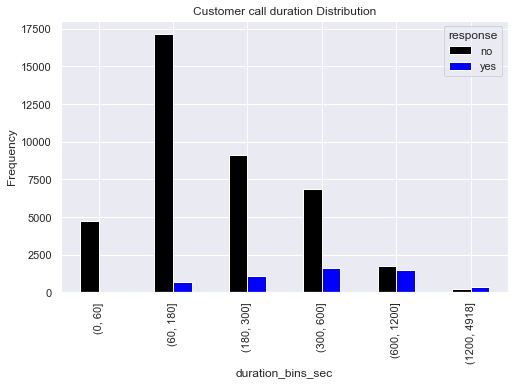

In [62]:
pd.crosstab(data2.duration_bins_sec,data2.response).plot(kind="bar",figsize=(8,5),color=['black','blue'])
plt.title('Customer call duration Distribution')
plt.ylabel('Frequency')

### Comparision age of customers with target variable "response"

In [63]:
# Create bins for age column
data2['age_bins']=pd.cut(x=data2['age'], bins=[18,30,40,50,70.5])
data2['age_by_decad'] = pd.cut(x=data2['age'], bins=[18,30,40,50,70.5], labels=['30s', '40s', '50s','70s'])
data2.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,response,job,education,duration_bins_sec,age_bins,age_by_decad
0,26.0,20000,-93,single,yes,no,yes,no,cellular,18,...,2.0,-1,0,unknown,no,blue-collar,secondary,"(300, 600]","(18.0, 30.0]",30s
1,48.0,50000,-379,married,yes,no,yes,no,cellular,22,...,2.0,-1,0,unknown,no,admin.,secondary,"(300, 600]","(40.0, 50.0]",50s
2,34.0,20000,170,married,yes,no,yes,yes,telephone,17,...,4.0,275,7,other,no,blue-collar,primary,"(300, 600]","(30.0, 40.0]",40s
3,37.0,60000,5287,married,yes,no,yes,yes,cellular,19,...,4.0,100,2,failure,no,technician,secondary,"(300, 600]","(30.0, 40.0]",40s
4,50.0,20000,181,married,yes,no,yes,no,cellular,17,...,2.0,-1,0,unknown,no,blue-collar,secondary,"(300, 600]","(40.0, 50.0]",50s


Text(0, 0.5, 'Frequency')

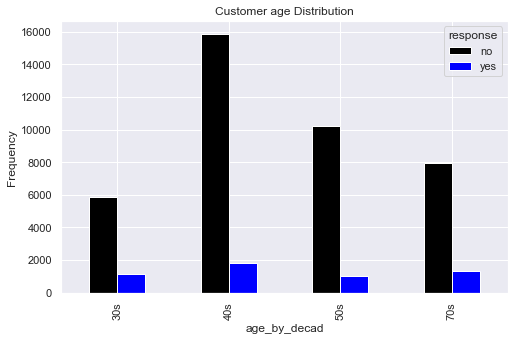

In [64]:
pd.crosstab(data2.age_by_decad,data2.response).plot(kind="bar",figsize=(8,5),color=['black','blue'])
plt.title('Customer age Distribution')
plt.ylabel('Frequency')

In [65]:
a1 = data2[(data2['age']>18)&(data2['age']<30)]['response'].value_counts()
print("Yes response percentage for 18-30 age: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))
a1 = data2[(data2['age']>30)&(data2['age']<40)]['response'].value_counts()
print("Yes response percentage for 30-40 age: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))
a1 = data2[(data2['age']>40)&(data2['age']<50)]['response'].value_counts()
print("Yes response percentage for 40-50 age: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))
a1 = data2[(data2['age']>50)&(data2['age']<70.5)]['response'].value_counts()
print("Yes response percentage for 50-70.5 age: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))

Yes response percentage for 18-30 age:  17.5005
Yes response percentage for 30-40 age:  10.3932
Yes response percentage for 40-50 age:  9.2013
Yes response percentage for 50-70.5 age:  12.4829


### Comparision salary of customers with target variable "response"

Text(0, 0.5, 'Frequency')

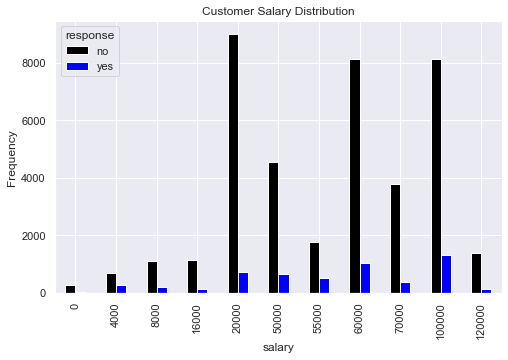

In [66]:
pd.crosstab(data2.salary,data2.response).plot(kind="bar",figsize=(8,5),color=['black','blue'])
plt.title('Customer Salary Distribution')
plt.ylabel('Frequency')

In [67]:
a1 = data2[(data2['salary']>0)&(data2['salary']<20000)]['response'].value_counts()
print("Yes response percentage for 0-20k age: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))

a1 = data2[(data2['salary']>20000)&(data2['salary']<55000)]['response'].value_counts()
print("Yes response percentage for 20k-55k age: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))

a1 = data2[(data2['salary']>55000)&(data2['salary']<100000)]['response'].value_counts()
print("Yes response percentage for 55k-1lac age: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))

a1 = data2[(data2['salary']>100000)]['response'].value_counts()
print("Yes response percentage for > 1 lac age: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))

Yes response percentage for 0-20k age:  16.6667
Yes response percentage for 20k-55k age:  12.1951
Yes response percentage for 55k-1lac age:  10.4753
Yes response percentage for > 1 lac age:  8.2773


## 3.7 Correlation Matrix

- A heat map is a two-dimensional representation of data in which values are represented by colors which provides a visual summary of information.


- Heat map work with only numerical values.

<AxesSubplot:>

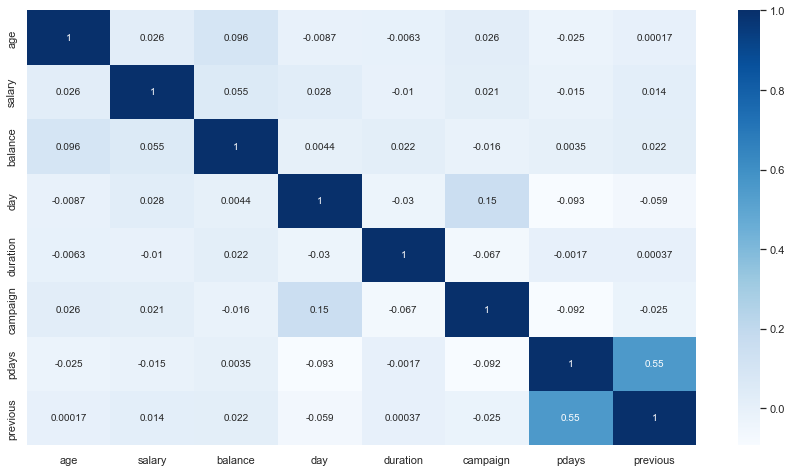

In [68]:
plt.figure(figsize=[15,8])
sns.heatmap(data2.corr(),annot=True,cmap="Blues")

# 4. Conclusion 

The analysis are the recommendations for future marketing campaigns:
    
- Future campaigns should be targeted on customers from age categories below 30 years old and above 50 years old. Student and Senior citizen are more responded.


- The number of contacts with the customer shouldn't exceed 3.


- Mode of contact should be cellular and telephone.


- The month of highest level of marketing activity was the month of May. But high response rate of customers is in (March, September and October). Campaign highly active in summer time. So, for future campaign marketing activity should be increase in winter season.


- Call duration highly effect the response rate. Response rate and call duration is directly personal. So, when increase call duration response rate also increase.


- Married people are more positive response.


- House loan demand more in customers than personal loan. People wo preferred housing loan and not default are best to target.


- People who have management, technician and blue-collar related jobs are best to target.


- People who have completed their secondary education respond more. Students come under this category most.


- Low salary customers have more “yes” response.
